In [89]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Linear regression model


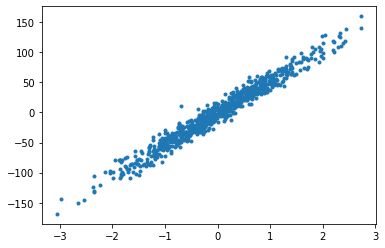

In [90]:
x_train, x_test, y_train, y_test = np.load('/content/drive/MyDrive/ML_HW1/regression_data.npy', allow_pickle=True)
plt.plot(x_train, y_train, '.')

In [91]:
x_train = np.array(x_train).flatten()
size_train = float(len(x_train))
y_train = np.array(y_train)

x_test = np.array(x_test).flatten()
size_test = float(len(x_test))
y_test = np.array(y_test)

weights = np.random.normal()
intercepts = np.random.normal()

eta = 0.005
epochs = 1000

train_history = []

for i in range(epochs): 
    y_pred = weights * x_train + intercepts
    y_pred_test = weights * x_test + intercepts
    weights = weights - eta * ((-2 / size_train) * sum(x_train * (y_train - y_pred)))
    intercepts = intercepts - eta * ((-2 / size_train) * sum(y_train - y_pred))
    train_history.append((1 / size_train) * sum((y_train - y_pred)**2))

MSE = (1 / size_test) * sum((y_test - y_pred_test)**2)
y_pred = weights * x_train + intercepts

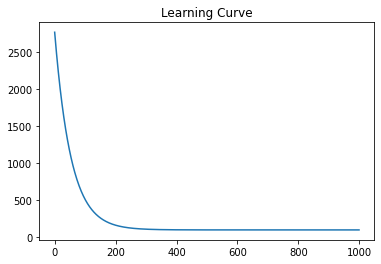

In [92]:
plt.title('Learning Curve')
plt.plot(train_history)
plt.show()

In [93]:
print("Mean Square Error:", MSE)
print("weights:", weights)
print("intercepts:", intercepts)

Mean Square Error: 110.42352089914914
weights: 52.73882513770308
intercepts: -0.3344699947594075


# Logistic regression model

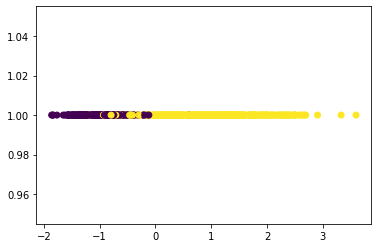

In [94]:
x_train, x_test, y_train, y_test = np.load('/content/drive/MyDrive/ML_HW1/classification_data.npy', allow_pickle=True)
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

In [95]:
x_train = np.array(x_train).flatten()
y_train = np.array(y_train)
size_train = float(len(x_train))
x_test = np.array(x_test).flatten()
size_test = float(len(x_test))
y_test = np.array(y_test)

weights = np.random.normal()
intercepts = np.random.normal()

eta = 0.005
epochs = 500

train_history = []

for i in range(epochs): 
    y_pred = 1 / (1 + np.exp(weights * x_train + intercepts))
    weights = weights - (eta * sum((y_train - y_pred) * x_train))
    intercepts = intercepts - (eta * sum(y_train - y_pred))
    train_history.append(sum((-y_train) * np.log(y_pred) - (1 - y_train) * np.log(1 - y_pred)))
    y_pred_test = 1 / (1 + np.exp(weights * x_test + intercepts))

cross_entropy = sum((-y_test) * np.log(y_pred_test) - (1 - y_test) * np.log(1 - y_pred_test))

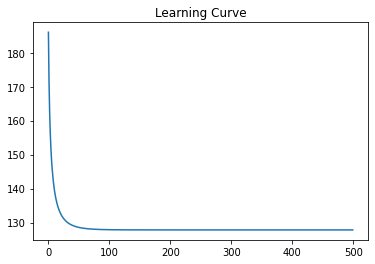

In [96]:
plt.title('Learning Curve')
plt.plot(train_history)
plt.show()

In [97]:
print("cross_entropy:", cross_entropy)
print("weights:", weights)
print("intercepts:", intercepts)

cross_entropy: 47.24761018449381
weights: -4.876889778933664
intercepts: -1.7116223226069782
